# 2. Models Evaluation


## To Do

- GridSearch/Random Search for each model: 
- logistic regression
- decision tree  .. .randomforrest, and get feature importance to help refine number of features .. but need lables?
- neural network

- Repeat with PCA components
- Repeat with changes in features
- ?? SMOTE

- Compare across all models
- ?? What are the best evaluation metrics to use? Make sure understand their interpretation

!! NB
- lower gini index is better

## Imports & Functions

In [1]:
# Import typically used packages
import pandas as pd
import numpy as np
import sklearn as sk

import time

# ML Prep & Modelling
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('default')

In [2]:
# Function to Present the Evaluation Metrics for a Classification Model

def classification_metrics(for_Model, X_test, y_test, y_pred):
    plt.style.use('default')

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Print various metrics
    print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=y_pred):.4f}')
    print(f'Precision: {metrics.precision_score(y_true=y_test, y_pred=y_pred, pos_label="yes"):.4f}')
    print(f'Recall: {metrics.recall_score(y_true=y_test, y_pred=y_pred, pos_label="yes"):.4f}')
    print(f'F1 Score {metrics.f1_score(y_true=y_test, y_pred=y_pred, pos_label="yes"):.4f}')
    print(f'Specificity: {tn / (tn + fp):.4f}')
    print(f'Hamming Loss {metrics.hamming_loss(y_true=y_test, y_pred=y_pred):.4f}')


    # Plot Confusion Matrix
    class_labels = for_Model.classes_
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set_title('Confusion Matrix')
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(ax=ax)
    plt.show

    y_probabilities = for_Model.predict_proba(X_test)[:, 1]
    roc_auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_probabilities)
    print(f'ROC-AUC Score {roc_auc_score:.4f}')
    gini_score = 2 * roc_auc_score - 1
    print(f'Gini Index: {gini_score:.4f}')

    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('ROC Curve')
    roc_display = RocCurveDisplay.from_estimator(for_Model, X_test, y_test, ax=ax, pos_label="yes")
    plt.show()

    plt.style.use('ggplot')

In [3]:
def print_search_results(search, duration):
    print('------- Search Results --------')
    all_search_results = pd.DataFrame(search.cv_results_)
    print(f"Score: {search.best_score_:.4f}. Mean: {np.mean(all_search_results['mean_test_score']):.4f} and STD {np.std(all_search_results['mean_test_score']):.4f}")
    print(f'Search Took: {duration:.2f} seconds')
    print(f"Best Parameters: {search.best_params_}")
    top_n = 10
    print(f"Top {top_n} out of {len(all_search_results)} combinations:")
    display(all_search_results[['rank_test_score', 'mean_test_score', 'mean_fit_time', 'mean_score_time', 'params']].sort_values(by='rank_test_score').head(top_n))

## Load the Data

In [5]:
# Load saved dataset
import pickle

with open('xy_data.pickle', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)

## Temp

## Train Different Models - Logistic Regression

In [ ]:
param_grid = {'class_weight': [{0:1, 1:100}, {0:1, 1:10}, 'balanced']}
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, scoring='roc_auc')
grid.fit(X, y)

/opt/anaconda3/envs/ml_packages_v3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/ml_packages_v3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


------- Search Results --------
Score: 0.7465. Mean: 0.7449 and STD 0.0010
Search Took: 79.66 seconds
Best Parameters: {'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 500, 'logisticregression__class_weight': 'balanced', 'logisticregression__C': 0.01}
Top 10 out of 10 combinations:


,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,params
0,1,0.746521,0.070753,0.011297,"{'logisticregression__solver': 'liblinear', 'l..."
5,2,0.746096,4.495525,0.013883,"{'logisticregression__solver': 'saga', 'logist..."
2,3,0.746047,0.209946,0.011812,"{'logisticregression__solver': 'liblinear', 'l..."
8,4,0.745128,0.080883,0.011034,"{'logisticregression__solver': 'liblinear', 'l..."
6,5,0.744536,7.873019,0.014978,"{'logisticregression__solver': 'saga', 'logist..."
1,6,0.744191,0.084046,0.010917,"{'logisticregression__solver': 'liblinear', 'l..."
9,7,0.744182,0.821533,0.010801,"{'logisticregression__solver': 'saga', 'logist..."
3,8,0.744072,0.092063,0.011172,"{'logisticregression__solver': 'liblinear', 'l..."
4,8,0.744072,0.102054,0.013272,"{'logisticregression__solver': 'liblinear', 'l..."
7,10,0.743655,1.929644,0.010895,"{'logisticregression__solver': 'saga', 'logist..."


Accuracy: 0.6872
Precision: 0.3425
Recall: 0.6817
F1 Score 0.4560
Specificity: 0.6885
Hamming Loss 0.3128
ROC-AUC Score 0.7492
Gini Index: 0.4985


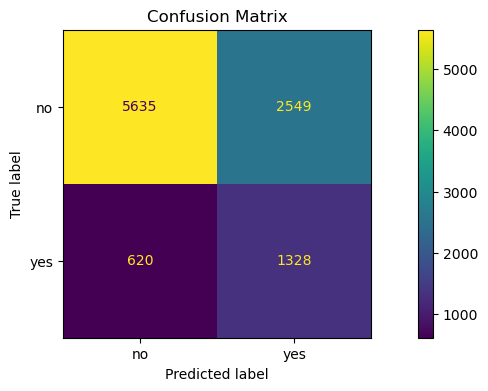

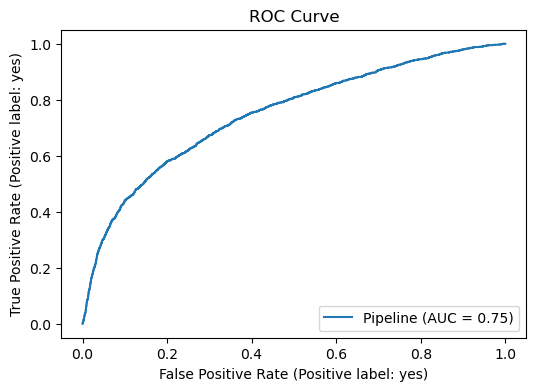

In [25]:
# Logistic Regression
# Establish a pipeline for a randomised search & get the best fitted model

logreg_pipeline = make_pipeline(
    LogisticRegression(random_state=42)
)
grid_params = {
    'logisticregression__penalty': ['l1', 'l2'],                # L1 or L2 regularisation
    'logisticregression__solver': ['saga', 'liblinear'],        # Saga is a variant of Sag. With L1 or l2. Large dataset. liblinear is for small datasets, binary classifications
    'logisticregression__C': [0.01, 0.1, 1, 5],                 # Strength of regularisation, default is 1, smaller is stronger
    'logisticregression__max_iter': [500, 600],                 # Max 500 iterations seems to be sufficient
    'logisticregression__class_weight': ['balanced']  
}                       

# Run the search
start_time = time.perf_counter()
#rand_search = RandomizedSearchCV(logreg_pipeline, grid_params, scoring='roc_auc', cv=5, refit='accuracy')
rand_search = RandomizedSearchCV(logreg_pipeline, grid_params, scoring='roc_auc', cv=5)
rand_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time

# Show the results
print_search_results(rand_search, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_logreg_rand = rand_search.best_estimator_
y_pred = model_logreg_rand.predict(X_test)
classification_metrics(model_logreg_rand, X_test, y_test, y_pred)

In [ ]:
# Logistic Regression
# Establish a pipeline for a randomised search & get the best fitted model

logreg_pipeline = make_pipeline(
    LogisticRegression(random_state=42)
)
grid_params = {
    'logisticregression__penalty': ['l1', 'l2'],                # L1 or L2 regularisation
    'logisticregression__solver': ['saga', 'liblinear'],        # Saga is a variant of Sag. With L1 or l2. Large dataset. liblinear is for small datasets, binary classifications
    'logisticregression__C': [0.01, 0.1, 1, 5],                 # Strength of regularisation, default is 1, smaller is stronger
    'logisticregression__max_iter': [1000]                  # Max 500 iterations seems to be sufficient
}                       

# Run the search
start_time = time.perf_counter()
rand_search = RandomizedSearchCV(logreg_pipeline, grid_params, scoring='accuracy', cv=5, refit='accuracy')
rand_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time

# Show the results
print_search_results(rand_search, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_logreg_rand = rand_search.best_estimator_
y_pred = model_logreg_rand.predict(X_test)
classification_metrics(model_logreg_rand, X_test, y_test, y_pred)


In [7]:
# Show the results
print_search_results(rand_search, duration)

------- Search Results --------
Score: 0.8200. Mean: 0.8176 and STD 0.0038
Search Took: 41.63 seconds
Best Parameters: {'logisticregression__solver': 'saga', 'logisticregression__penalty': 'l1', 'logisticregression__max_iter': 1000, 'logisticregression__C': 1}
Top 10 out of 10 combinations:


,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,params
1,1,0.820026,4.398982,0.011598,"{'logisticregression__solver': 'saga', 'logist..."
2,2,0.819902,0.716923,0.008696,"{'logisticregression__solver': 'saga', 'logist..."
8,3,0.819804,0.817637,0.008514,"{'logisticregression__solver': 'saga', 'logist..."
6,4,0.819508,0.162241,0.008031,"{'logisticregression__solver': 'liblinear', 'l..."
3,5,0.819310,0.624459,0.008113,"{'logisticregression__solver': 'saga', 'logist..."
0,6,0.819211,0.129458,0.008540,"{'logisticregression__solver': 'liblinear', 'l..."
7,7,0.818940,0.067877,0.008050,"{'logisticregression__solver': 'liblinear', 'l..."
4,8,0.818101,0.111793,0.008732,"{'logisticregression__solver': 'liblinear', 'l..."
9,9,0.813758,0.054712,0.007955,"{'logisticregression__solver': 'liblinear', 'l..."
5,10,0.807392,0.068144,0.008509,"{'logisticregression__solver': 'liblinear', 'l..."


Accuracy: 0.8260
Precision: 0.6448
Recall: 0.2115
F1 Score 0.3185
Specificity: 0.9723
Hamming Loss 0.1740
ROC-AUC Score 0.7459
Gini Index: 0.4918


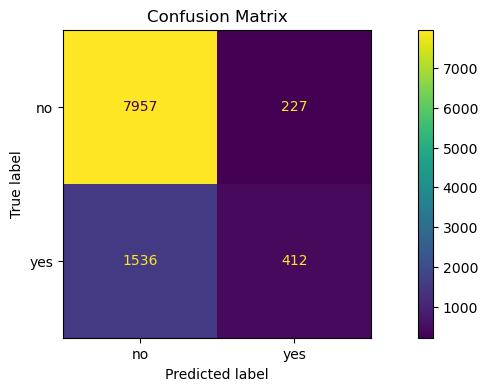

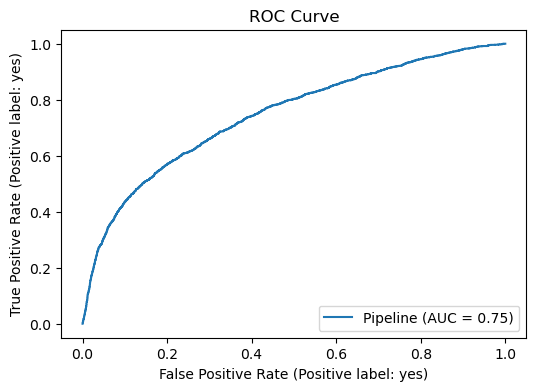

In [9]:
# Get the Best Model & Calculate Predicted Y and Evaluate
model_logreg_rand = rand_search.best_estimator_
y_pred = model_logreg_rand.predict(X_test)
classification_metrics(model_logreg_rand, X_test, y_test, y_pred)

In [ ]:
# Logistic Regression
# Establish a pipeline for a grid search & get the best fitted model

logreg_pipeline = make_pipeline(
    LogisticRegression(random_state=42)
)
grid_params = {
    'logisticregression__penalty': ['l1', 'l2'],                # L1 or L2 regularisation
    'logisticregression__solver': ['saga', 'liblinear'],        # Saga is a variant of Sag. With L1 or l2. Large dataset. liblinear is for small datasets, binary classifications
    'logisticregression__C': [0.01, 0.1, 1, 5],                 # Strength of regularisation, default is 1, smaller is stronger
    'logisticregression__max_iter': [500]                       # Max 500 iterations seems to be sufficient
}                       

# Run the search
start_time = time.perf_counter()
grid_search = GridSearchCV(logreg_pipeline, grid_params, scoring='accuracy', cv=5, refit='accuracy')
grid_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time


In [ ]:
# Show the results
print_search_results(grid_search, duration)

In [ ]:
# Get the Best Model & Calculate Predicted Y and Evaluate

model_logreg = grid_search.best_estimator_
y_pred = model_logreg.predict(X_test)
classification_metrics(model_logreg, y_test, y_pred)

## Train Different Models - Decision Tree

In [ ]:
# Decision Tree
# Establish a pipeline for a grid search & get the best fitted model

randforest_pipeline = make_pipeline(
    RandomForestClassifier(random_state=42)
)
grid_params = {
    'randomforestclassifier__n_estimators': [200, 400],            # Number of trees
    'randomforestclassifier__max_depth': [25, 50],
    'randomforestclassifier__max_leaf_nodes': [5, 50],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__class_weight': ['balanced']    # Gives more importance to minority classes ... ?? Improves recall at the expense of precision
}                       

# Run the search
start_time = time.perf_counter()
grid_search = GridSearchCV(randforest_pipeline, grid_params, cv=5)
grid_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time

In [ ]:
# Show the results
print_search_results(grid_search, duration)


In [ ]:
# Get the Best Model & Calculate Predicted Y and Evaluate

model_randforest = grid_search.best_estimator_
y_pred = model_randforest.predict(X_test)
classification_metrics(model_randforest, y_test, y_pred)

In [ ]:
# Feature importance from the trained model

# Assuming you have the feature names stored in a list called feature_names
# Ensure feature_names has the correct length
feature_names = [f'feature{i+1}' for i in range(X_train.shape[1])]  # Replace with actual feature names if available

feature_importances = pd.Series(model_randforest.named_steps['randomforestclassifier'].feature_importances_, index=feature_names).sort_values(ascending=False)
print(feature_importances)


?? Metrics
- entropy
- log loss

## Apply PCA

In [ ]:
# Decision Tree
# Establish a pipeline for a grid search & get the best fitted model

from sklearn.decomposition import PCA
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

randforest_pipeline = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)
grid_params = {
    'pca__n_components': [40],                           # PCA to reduce from 135 components. Reduces execution time. 40 seems ok
    'randomforestclassifier__n_estimators': [150],        # Number of trees
    'randomforestclassifier__max_depth': [10, 25],
    'randomforestclassifier__max_leaf_nodes': [5, 50],
    'randomforestclassifier__min_samples_split': [2, 5],
}                       

# Run the search
start_time = time.perf_counter()
grid_search_s = GridSearchCV(randforest_pipeline, grid_params, cv=5)
grid_search_s.fit(X_train_dense, y_train)
duration = time.perf_counter() - start_time

# Show the results
print_search_results(grid_search_s, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test_dense)
classification_metrics(model_randforest_S, X_test_dense, y_test, y_pred)


In [ ]:
# Show the results
print_search_results(grid_search_s, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test_dense)
classification_metrics(model_randforest_S, X_test_dense, y_test, y_pred)

## Apply SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC(categorical_features=, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

In [ ]:
# Decision Tree
# Establish a pipeline for a grid search & get the best fitted model

randforest_pipeline = make_pipeline(
    RandomForestClassifier(random_state=42)
)
grid_params = {
    'randomforestclassifier__n_estimators': [10],            # Number of trees
    'randomforestclassifier__max_depth': [10, 50],
    'randomforestclassifier__max_leaf_nodes': [5, 50],
    'randomforestclassifier__min_samples_split': [2, 5],
}                       

# Run the search
start_time = time.perf_counter()
grid_search_s = GridSearchCV(randforest_pipeline, grid_params, cv=5)
grid_search_s.fit(X_resampled, y_resampled)
duration = time.perf_counter() - start_time

In [ ]:
# Show the results
print_search_results(grid_search_s, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate

model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test)
classification_metrics(model_randforest_S, y_test, y_pred)

In [ ]:
# Get the Best Model & Calculate Predicted Y and Evaluate

model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test)
classification_metrics(model_randforest_S, y_test, y_pred)